#その1

ダミー変数追加後 (70000, 785)
ダミー変数追加後 (70000, 785)
One Hot Vector化後 (70000, 10)
(60000, 785) (10000, 785) (60000,) (10000,) (60000, 10) (10000, 10)


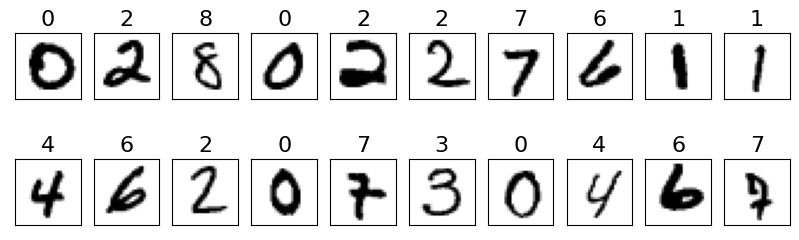

[11  3  9 17 12] True
[ 2  7 18  0  8] False
[ 1 16 10 14 15] False
[19  4  5 13  6] False
[12  5 18 15 10] True
[17 19  1  2  9] False
epoch = 0 loss = 2.302684 score = 0.102800
epoch = 1 loss = 2.301634 score = 0.113500
epoch = 2 loss = 2.301854 score = 0.102800
epoch = 3 loss = 2.301373 score = 0.113500
epoch = 4 loss = 2.301066 score = 0.113500
epoch = 5 loss = 2.301543 score = 0.113500
epoch = 6 loss = 2.301131 score = 0.113500
epoch = 7 loss = 2.301606 score = 0.113500
epoch = 8 loss = 2.301661 score = 0.103200
epoch = 9 loss = 2.301806 score = 0.113500
epoch = 10 loss = 2.301595 score = 0.113500
epoch = 11 loss = 2.301835 score = 0.113500
epoch = 12 loss = 2.301385 score = 0.113500
epoch = 13 loss = 2.302149 score = 0.102800
epoch = 14 loss = 2.301034 score = 0.113500
epoch = 15 loss = 2.301517 score = 0.102800
epoch = 16 loss = 2.301389 score = 0.113500
epoch = 17 loss = 2.301642 score = 0.113500
epoch = 18 loss = 2.301591 score = 0.113500
epoch = 19 loss = 2.301194 score = 0.1

ValueError: operands could not be broadcast together with shapes (785,128) (128,128) 

In [3]:
# 必要ライブラリの宣言
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# データ読み込み
# 注意: 大量の学習データをインターネットからダウンロードするので、処理に数分かかります
# 2020-06-17 従来の方式で読み込みできなくなったので、新しい方式に切り替えました。

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1,)

x_org, y_org = mnist.data, mnist.target.astype(np.int)

import pandas as pd
if type(x_org) == pd.core.frame.DataFrame:
    x_org = x_org.values
    y_org = y_org.values
# 入力データの加工

# step1 データ正規化 値の範囲を[0, 1]とする
x_norm = x_org / 255.0

# 先頭にダミー変数(1)を追加
x_all = np.insert(x_norm, 0, 1, axis=1)

print('ダミー変数追加後', x_all.shape)

# 入力データの加工

# step1 データ正規化 値の範囲を[0, 1]とする
x_norm = x_org / 255.0

# 先頭にダミー変数(1)を追加
x_all = np.insert(x_norm, 0, 1, axis=1)

print('ダミー変数追加後', x_all.shape)

# step 2 yをOne-hot-Vectorに

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
y_all_one = ohe.fit_transform(np.c_[y_org])
print('One Hot Vector化後', y_all_one.shape)

# step 3 学習データ、検証データに分割

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, y_train_one, y_test_one = train_test_split(
    x_all, y_org, y_all_one, train_size=60000, test_size=10000, shuffle=False)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, 
    y_train_one.shape, y_test_one.shape)

# データ内容の確認
# 2020-06-17 
# 読み込み元データが変更になったため、図10-2、図10-9と画像が変わっています。

N = 20
np.random.seed(12)
indexes = np.random.choice(y_test.shape[0], N, replace=False)
x_selected = x_test[indexes,1:]
y_selected = y_test[indexes]
plt.figure(figsize=(10, 3))
for i in range(N):
    ax = plt.subplot(2, int(N/2), i + 1)
    plt.imshow(x_selected[i].reshape(28, 28),cmap='gray_r')
    ax.set_title('%d' %y_selected[i], fontsize=16)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# シグモイド関数
def sigmoid(x):
    return 1/(1+ np.exp(-x))

# softmax関数
def softmax(x):
    x = x.T
    x_max = x.max(axis=0)
    x = x - x_max
    w = np.exp(x)
    return (w / w.sum(axis=0)).T

# 交差エントロピー関数
def cross_entropy(yt, yp):
    return -np.mean(np.sum(yt * np.log(yp), axis=1))

# 評価処理 (戻り値は精度と損失関数)
from sklearn.metrics import accuracy_score

def evaluate(x_test, y_test, y_test_one, V, W):
    b1_test = np.insert(sigmoid(x_test @ V), 0, 1, axis=1)
    yp_test_one = softmax(b1_test @ W)
    yp_test = np.argmax(yp_test_one, axis=1)
    loss = cross_entropy(y_test_one, yp_test_one)
    score = accuracy_score(y_test, yp_test)
    return score, loss   
#その3
# 評価処理 (ReLU関数対応版)(教科書にはないため配る)
from sklearn.metrics import accuracy_score
def ReLU(x):
    return np.maximum(0, x)
def step(x):
    return 1 * (x > 0)

# 学習用数値設計画像
def evaluate2(x_test, y_test, y_test_one, V, W):
    b1_test = np.insert(ReLU(x_test @ V), 0, 1, axis=1)
    yp_test_one = softmax(b1_test @ W)
    yp_test = np.argmax(yp_test_one, axis=1)
    loss = cross_entropy(y_test_one, yp_test_one)
    score = accuracy_score(y_test, yp_test)
    return score, loss
from sklearn.metrics import accuracy_score

def evaluate3(x_test, y_test, y_test_one, U, V, W):
    b1_test = np.insert(ReLU(x_test @ U), 0, 1, axis=1)
    d1_test = np.insert(ReLU(b1_test @ V), 0, 1, axis=1)
    yp_test_one = softmax(d1_test @ W)
    yp_test = np.argmax(yp_test_one, axis=1)
    loss = cross_entropy(y_test_one, yp_test_one)
    score = accuracy_score(y_test, yp_test)
    return score, loss   
# ミニバッチ用index取得関数
import numpy as np

class Indexes():
    
    # コンストラクタ
    def __init__(self, total, size):
        # 配列全体の大きさ
        self.total   = total
        # batchサイズ
        self.size    = size
        #　作業用indexes 初期値はNULLにしておく
        self.indexes = np.zeros(0) 

    # index取得関数    
    def next_index(self):
        next_flag = False
        
    # bacthサイズより作業用Indexesが小さい場合はindexes再生成
        if len(self.indexes) < self.size: 
            self.indexes = np.random.choice(self.total, 
                self.total, replace=False)
            next_flag = True
            
        # 戻り用index取得と作業用indexes更新
        index = self.indexes[:self.size]
        self.indexes = self.indexes[self.size:]
        return index, next_flag
    
# Indexesクラスのテスト

# クラス初期化
# 20: 全体の配列の大きさ
# 5: 一回に取得するindexの数
indexes = Indexes(20, 5)

for i in range(6):
    # next_index関数呼び出し
    # 戻り値1:  indexのnumpy配列
    # 戻り値2: 作業用Indexの更新があったかどうか
    arr, flag = indexes.next_index()
    print(arr, flag)

# 変数初期宣言 初期バージョン

# 隠れ層のノード数
H = 128
H1 = H + 1
# M: 訓練用系列データ総数
M  = x_train.shape[0]
# D: 入力データ次元数
D = x_train.shape[1]
# N: 分類クラス数
N = y_train_one.shape[1]

# 繰り返し回数
nb_epoch = 100
# ミニバッチサイズ
batch_size = 512
B = batch_size
# 学習率
alpha = 0.01

# 重み行列の初期設定(すべて1)
V = np.ones((D, H))
W = np.ones((H1, N))

# 評価結果記録用 (損失関数値と精度)
history1 = np.zeros((0, 3))

# ミニバッチ用関数初期化
indexes = Indexes(M, batch_size)

# 繰り返し回数カウンタ初期化
epoch = 0

# メイン処理
while epoch < nb_epoch:

    # 学習対象の選択(ミニバッチ学習法)
    index, next_flag = indexes.next_index()
    x, yt = x_train[index], y_train_one[index]
    
    # 予測値計算 (順伝播) 
    a = x @ V                         # (10.6.3)
    b = sigmoid(a)                    # (10.6.4)
    b1 = np.insert(b, 0, 1, axis=1)   # ダミー変数の追加 
    u = b1 @ W                        # (10.6.5)   
    yp = softmax(u)                   # (10.6.6)
    
    # 誤差計算 
    yd = yp - yt                      # (10.6.7)
    bd = b * (1-b) * (yd @ W[1:].T)   # (10.6.8)

    # 勾配計算
    W = W - alpha * (b1.T @ yd) / B   # (10.6.9)
    V = V - alpha * (x.T @ bd) / B    # (10.6.10)
    
    # ログ記録用
    if next_flag: # 1 epoch 終了後の処理
        score, loss = evaluate(
            x_test, y_test, y_test_one, V, W)
        history1 = np.vstack((history1, 
            np.array([epoch, loss, score])))
        print("epoch = %d loss = %f score = %f" 
            % (epoch, loss, score))
        epoch = epoch + 1

#損失関数値と精度の確認
print('初期状態: 損失関数:%f 精度:%f' 
        % (history1[0,1], history1[0,2]))
print('最終状態: 損失関数:%f 精度:%f' 
        % (history1[-1,1], history1[-1,2]))



# 変数初期宣言 初期バージョン

# 隠れ層のノード数
H = 128
H1 = H + 1
# M: 訓練用系列データ総数
M  = x_train.shape[0]
# D: 入力データ次元数
D = x_train.shape[1]
# N: 分類クラス数
N = y_train_one.shape[1]

# 繰り返し回数
nb_epoch = 100
# ミニバッチサイズ
batch_size = 512
B = batch_size
# 学習率
alpha = 0.01


# 重み行列の初期設定(すべて1)
#V = np.ones((D, H))
#W = np.ones((H1, N))

#その2
V=np.random.randn(D,H)/np.sqrt(D/2)
W=np.random.randn(H1,N)/np.sqrt(H1/2)

print(V[:2,:5])
print(W[:2,:5])

# 評価結果記録用 (損失関数値と精度)
history1 = np.zeros((0, 3))

# ミニバッチ用関数初期化
indexes = Indexes(M, batch_size)

# 繰り返し回数カウンタ初期化
epoch = 0

# メイン処理
while epoch < nb_epoch:

    # 学習対象の選択(ミニバッチ学習法)
    index, next_flag = indexes.next_index()
    x, yt = x_train[index], y_train_one[index]
    """    
    # 予測値計算 (順伝播) 
    a = x @ V                         # (10.6.3)
    b = sigmoid(a)                    # (10.6.4)
    b1 = np.insert(b, 0, 1, axis=1)   # ダミー変数の追加 
    u = b1 @ W                        # (10.6.5)   
    yp = softmax(u)                   # (10.6.6)
   

    # 誤差計算 
    yd = yp - yt                      # (10.6.7)
    bd = b * (1-b) * (yd @ W[1:].T)   # (10.6.8)

    # 勾配計算
    W = W - alpha * (b1.T @ yd) / B   # (10.6.9)
    V = V - alpha * (x.T @ bd) / B    # (10.6.10)
    """
    #その2
    a=x@V
    b=ReLU(a)
    b1=np.insert(b,0,1,axis=1)
    u=b1@W
    yp=softmax(u)
    yd=yp-yt
    bd=step(a)*(yd@W[1:].T)
    W=W-alpha*(b1.T@yd)/B
    V=V-alpha*(a.T@bd)/B
    # ログ記録用
    if next_flag: # 1 epoch 終了後の処理
        score, loss = evaluate(
            x_test, y_test, y_test_one, V, W)
        history1 = np.vstack((history1, 
            np.array([epoch, loss, score])))
        print("epoch = %d loss = %f score = %f" 
            % (epoch, loss, score))
        epoch = epoch + 1

#損失関数値と精度の確認
print('初期状態: 損失関数:%f 精度:%f' 
        % (history1[0,1], history1[0,2]))
print('最終状態: 損失関数:%f 精度:%f' 
        % (history1[-1,1], history1[-1,2]))

# 学習曲線の表示 (損失関数値)
plt.plot(history1[:,0], history1[:,1])
plt.ylim(0,2.5)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.show()

# 学習曲線の表示 (精度)
plt.plot(history1[:,0], history1[:,2])
plt.ylim(0,1)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.show()


In [ ]:
#その２

V=np.random.randn(D,H)/np.sqrt(D/2)
W=np.random.randn(H1,N)/np.sqrt(H1/2)

print(V[:2,:5])
print(W[:2,:5])



#その３

In [ ]:
# 評価処理 (ReLU関数対応版)(教科書にはないため配る)
from sklearn.metrics import accuracy_score
def ReLU(x):
    return np.maximum(0, x)
def step(x):
    return 1 * (x > 0)

# 学習用数値設計画像
def evaluate2(x_test, y_test, y_test_one, V, W):
    b1_test = np.insert(ReLU(x_test @ V), 0, 1, axis=1)
    yp_test_one = softmax(b1_test @ W)
    yp_test = np.argmax(yp_test_one, axis=1)
    loss = cross_entropy(y_test_one, yp_test_one)
    score = accuracy_score(y_test, yp_test)
    return score, loss

a=x@V
b=ReLU(a)
b1=np.insert(b,0,1,axis=1)
u=b1@W
yp=softmax(u)
yd=yp-yt
bd=step(a)*(yd@W[1:].T)
W=W-alpha*(b1.T@yd)/B
V=V-alpha*(a.T@bd)/B

print('初期状態: 損失関数:%f 精度:%f' % history3[0,1],history3[0,2])

#その４

In [ ]:
# 評価処理 (隠れ層2階層対応版)(教科書にないため配る)
from sklearn.metrics import accuracy_score

def evaluate3(x_test, y_test, y_test_one, U, V, W):
    b1_test = np.insert(ReLU(x_test @ U), 0, 1, axis=1)
    d1_test = np.insert(ReLU(b1_test @ V), 0, 1, axis=1)
    yp_test_one = softmax(d1_test @ W)
    yp_test = np.argmax(yp_test_one, axis=1)
    loss = cross_entropy(y_test_one, yp_test_one)
    score = accuracy_score(y_test, yp_test)
    return score, loss   